In [1]:
import pandas as pd

from sklearn import datasets
from sklearn import manifold

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
DATASET_SIZE = 2000
FEATURE_COUNT = 64
CLASS_COUNT = 3

In [3]:
X, y = datasets.make_classification(n_classes=CLASS_COUNT,
                                    n_features=FEATURE_COUNT,
                                    n_clusters_per_class=1,
                                    n_informative=25,
                                    n_redundant= 25,
                                    n_samples=DATASET_SIZE,
                                    random_state=19850610)

data = pd.DataFrame(X)
data['class'] = y

In [4]:
encoder = manifold.Isomap(n_components=3)
X_reduced = encoder.fit_transform(X)
data_reduced = pd.DataFrame(X_reduced, columns=['c1','c2','c3'])
data_reduced['class'] = y

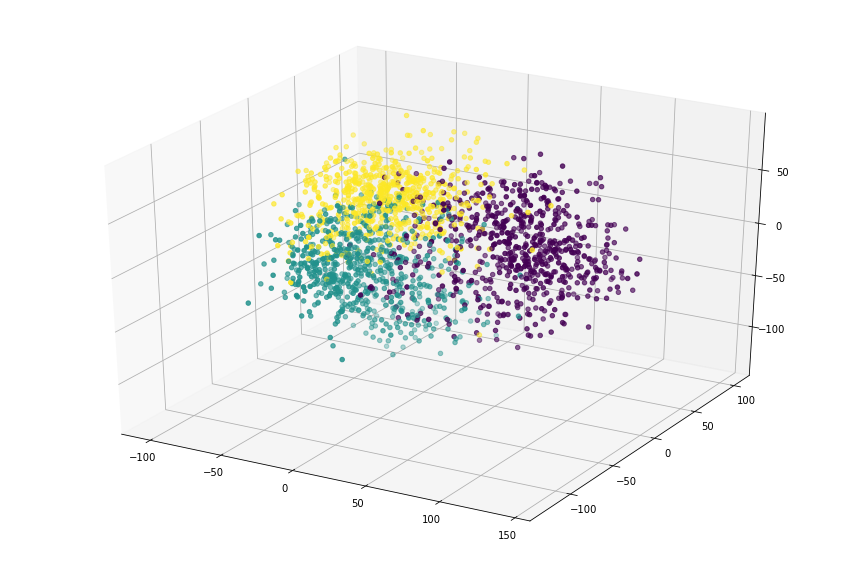

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data_reduced.c1, ys=data_reduced.c2, zs=data_reduced.c3, c=data['class'], marker='o')
plt.show()

In [7]:
means = data.mean(axis=0)
stdvs = data.std(axis=0)
maxs = data.max(axis=0)
mins = data.min(axis=0)
df_params = pd.DataFrame({"mean":means, "stdv":stdvs, "max":maxs, "min":mins})

df_params[:64]

,max,mean,min,stdv
0,8.613757,-0.459068,-9.810630,2.931419
1,27.206817,0.452976,-40.614726,8.505586
2,3.127243,0.019996,-3.386526,1.014950
3,3.505720,-0.044230,-3.662128,0.992678
4,10.622091,0.912562,-10.656254,3.155885
5,3.339224,-0.001735,-3.522653,0.991671
6,3.348225,-0.005287,-2.808631,1.010768
7,40.389293,3.134879,-29.619831,11.010641
8,31.285034,0.964007,-20.762509,7.934290
9,3.526094,-0.017997,-3.584155,0.978529


In [8]:
data.to_csv(path_or_buf="data/data-01.csv", header=False, index=True)
df_params[:64].to_csv(path_or_buf="data/params.csv", header=True, index=True)

In [27]:
pd.read_csv("data/data-01.csv", header=None, index_col=0).head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
0,,,,,,,,,,,,,,,,,,,,,
0,0.469372,14.909970,-0.143713,-0.183834,0.581946,-0.953651,1.286347,10.613341,7.317261,-0.816839,...,1.404855,-2.436542,0.638424,1.049799,13.598697,2.313769,0.548431,-8.643081,6.520420,2
1,-4.608607,-0.514561,1.176448,-1.670271,1.862705,-0.471831,-1.450768,30.788209,0.704760,0.232193,...,-5.818096,0.169756,-9.620762,-0.626544,-27.977149,5.077998,-0.186456,7.285649,1.106245,0
2,0.688104,-4.470388,0.986618,0.578131,1.074669,1.216215,1.020623,6.314511,-2.331113,-0.241309,...,-4.004284,-6.552877,3.201114,-0.689824,-3.967041,-2.127918,0.800095,3.040544,0.900198,0
3,-2.525307,9.911345,-0.459513,1.158686,-1.229178,0.981738,-0.244597,-16.695149,4.085909,-1.618541,...,1.336608,-1.909458,3.006876,0.916807,10.432539,1.212131,-0.108604,-12.213724,1.955776,2
4,-1.103708,4.714955,1.001697,0.038385,0.541927,-0.015985,-0.403777,-5.903511,5.083847,-0.849777,...,-1.913361,-1.145389,6.852384,0.590874,7.426283,2.666639,-0.238354,5.510235,4.123344,2
